# ALgorithmes gloutons 
- interval scheduling
- huffman
- greedy vs DP
- preuve de correction

In [21]:
# fonction greedy qui permet 
coins = [1, 2, 5, 10, 20, 50, 100, 200]
def change(value: int) -> list[int]:

    # sort the coins values (par ordre decroissant)
    # 
    result = []
    sorted_coins = reversed(coins) # O (n log n)
    for coin in sorted_coins: # O(n)
        if coin <= value:
            n = value // coin
    pass

change(83)

### on prends l'exemple de  43 :

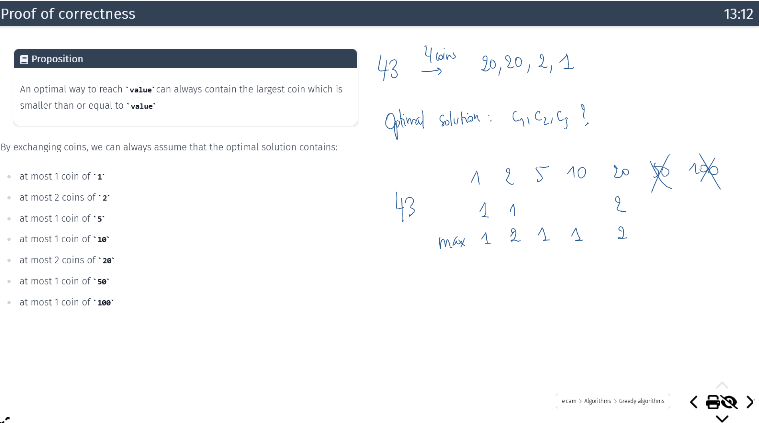



In [8]:
def compare(a, b):
    #return true si ab est mieux que ba, false sinon
    if int(str(a) + str(b)) >= int(str(b) + str(a)):
        return True
    return False

def custom_merge_sort(numbers: list[int] -> list[int]):
    # utiliser compare au lieu de > classique
    if len(numbers) < 2:
        return numbers
    A, B = numbers[: len(numbers)//2], numbers[len(numbers)//2:]
    A, B = custom_merge_sort(A), custom_merge_sort(B)
    result = []
    while A and B:
        if compare(A[0], B[0]): # seule ligne à chager par rapport au merge sort de base car on verifie ce qu'il y'a derrière
            result.append(A.pop(0))
        return result.append(B.pop(0))
    return ""
    

    pass

def largest(numbers: list[int]) -> str:
    # filtre par plus grand nombre
    tri_largest = reversed(numbers)
    return list(tri_largest)

#largest([3,30,34,5,9])
custom_merge_sort([3,30,34,5,9])

SyntaxError: invalid syntax (3532745474.py, line 7)

# Fractional Knapsack

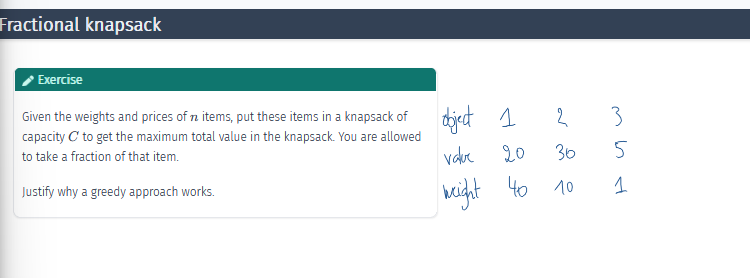

le but est de choisr la valeur/poids on a : 3, 2, 1

In [38]:
item = tuple[int, int, int] # (id, value, weight)

def FKS(items: list[item], capacity: int) -> list[item]:

    # trier par weight/value max
    items.sort(key=lambda i: i[1] / i[2], reverse=True)
    sel = []
    for item_id, value, weight in items:
        #solution1
        if weight <= capacity: # KS in big enough 
            sel.append([item_id, weight])
            capacity -= weight
        else:
            sel.append([item_id, capacity])
            capacity = 0
            #break
        #solution2
        ratio = min(capacity/weight, 1)
        sel.append([item_id, ratio*value, ratio*weight])
    return sel

FKS([(0, 60, 10), (1, 100, 20), (2, 120, 30)], 50)

[[0, 10], [0, 60, 10], [1, 20], [1, 100.0, 20.0], [2, 20], [2, 0.0, 0.0]]


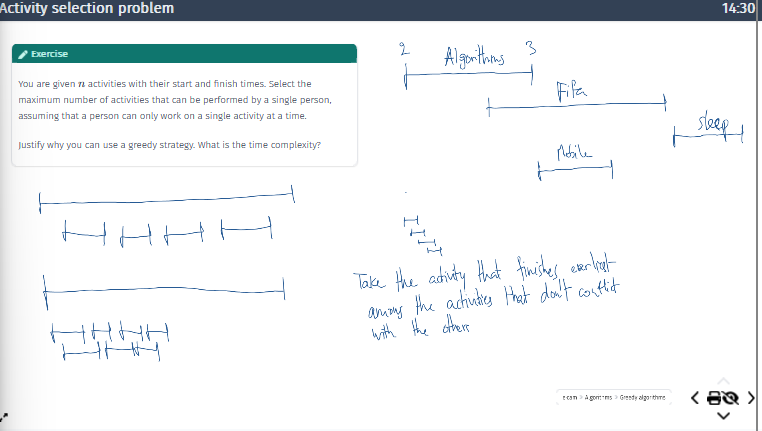

In [42]:
activity = tuple[int, int] # (start_time, end_time)

def activity_selection(activities: list[activity]) -> list[activity]:
    rsl = []
    # on trie l'activité qui se termine le plus tôt
    activities.sort(key=lambda a:a[1])
    for start_time, end_time in activities:
        if not rsl or rsl[-1][1] <= start_time:
            rsl.append((start_time, end_time)) 
    return rsl

activity_selection([(0, 3), (1, 4), (5, 7)])

[(0, 3), (5, 7)]

In [43]:
activity = tuple[int, int] # (start_time, end_time)

def activity_selection(activities: list[activity]) -> list[activity]:
    rsl = []
    busy_until = 0
    # on trie l'activité qui se termine le plus tôt
    activities.sort(key=lambda a:a[1])
    for start_time, end_time in activities:
        if start_time >= busy_until:
            rsl.append((start_time, end_time)) 
            busy_until = end_time
    return rsl

activity_selection([(0, 3), (1, 4), (5, 7)])

[(0, 3), (5, 7)]

Avec Greedy on a une compléxité n log n car on, dans certains algorithme greedy on a pas besoin de faire le sort on trie directement 
- le but de head : c'est de faire le trie partiel on s'en fou du reste

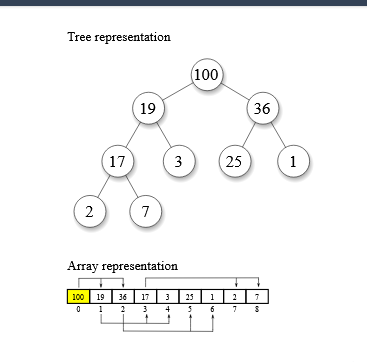

le parent est `n` ensuite les enfants sont : `2n + 1 , 2n + k`

* il existe 3 types des librairies: 

- `heapq.heapify(1)` : transform a list `1` into a heap in-place `O(n)` 'permet de changer la valeur max par min [4,3,2] il fait plutot[2,3,4] on echange la valeur de 4 par 2

- `heapq.pop(heap)`: remove and return the smallest item from `O(log n)`: il par exemple il enlève la valeur la plus petit pour faire monter une autre x. verticalement il fait le trie 

- `heapq.push(heap, item)`: on ajout un element sur la suite comme avec pop enève: on part sur un `O(log n)`

## Huffman encoding : introduction

l'encoding se fait en binaire, 

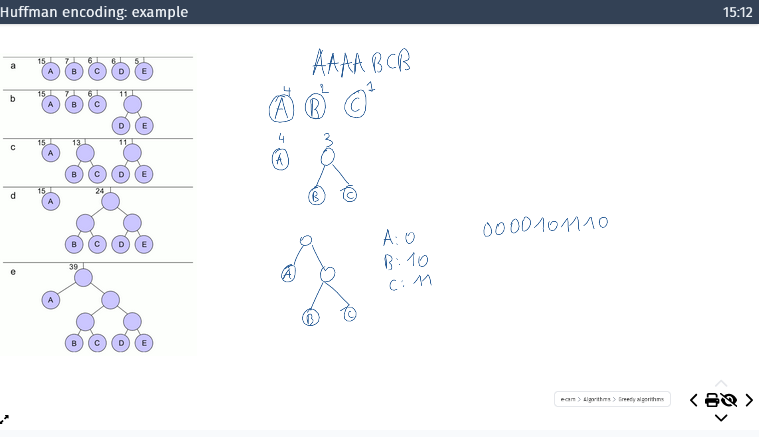

In [ ]:
from dataclasses import dataclass
from typing import Optional
from heapq import heapify
from heapq import heappop
from heapq import heappush
@dataclass
class Node:
    freq: int
    char: Optional[str] = None
    children: Optional[list['Node']] = None
    def __lt__(self, other):
        return self.freq < other.freq

def huffman(text: str):
    # Step 1: Calculate the frequencies of each letter in text
    freq = { c: text.count(c) for c in set(text)} # o(n)
    heap = [Node(char=c, freq=freq[c])for c in freq] #o(n)
    # Step 2: Heapify
    heapify(heap) # O(n)
    # Step 3: Take the least two frequent letters y, z
    while len(heap)>1:
        y, z = heappop(heap), heappop(heap) # n (log n)
    #         and replace them by w, which has y, z as children
        w = Node (freq=y.freq + z.freq, children= [y, z])
        heappush(heap, w) # o(l)
    # Step 4: Construct the codebook
    pass

huffman("aaavnba")

In [83]:
from heapq import heapify
from heapq import heappop
from heapq import heappush

job = tuple[int, int, int] # (id, deadline, profit)

def job_sequencing(jobs: list[job]) -> list[int | None]:
    # tier par profit
    jobs.sort(key=lambda a:a[2], reverse=True) #  n log n
    print(jobs)
    schedule = len(jobs) * [None]
    print(schedule)
    for id, deadline, profit in jobs:
        for slot in reversed (range(deadline)):
            if schedule[slot] is None:
                schedule[slot] = profit
                print(schedule)
                break        
    

    return schedule

job_sequencing([(0, 4, 20), (1, 1, 10), (2, 1, 40), (3, 1, 30)])

[(2, 1, 40), (3, 1, 30), (0, 4, 20), (1, 1, 10)]
[None, None, None, None]
[40, None, None, None]
[40, None, None, 20]


[40, None, None, 20]